In [1]:
%reset -f

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from lxml import etree
from functions import *

/var/folders/bc/71b26x1d0ld2w0vd11w1yndr0000gn/T/ipykernel_3809/1224822685.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
Posts = pd.read_xml('Posts.xml')
# PostLinks = pd.read_xml('PostLinks.xml')
Users = pd.read_xml('Users.xml')
Votes = pd.read_xml('Votes.xml')
Tags = pd.read_xml('Tags.xml')
PostHistory = pd.read_xml('PostHistory.xml')
Comments = pd.read_xml('Comments.xml')
# Badges = pd.read_xml('Badges.xml')

/Users/wojciechbasinski/stack-exchange-data/functions.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Hour', y='CommentCount', data=avg_comments_per_hour, palette="coolwarm")


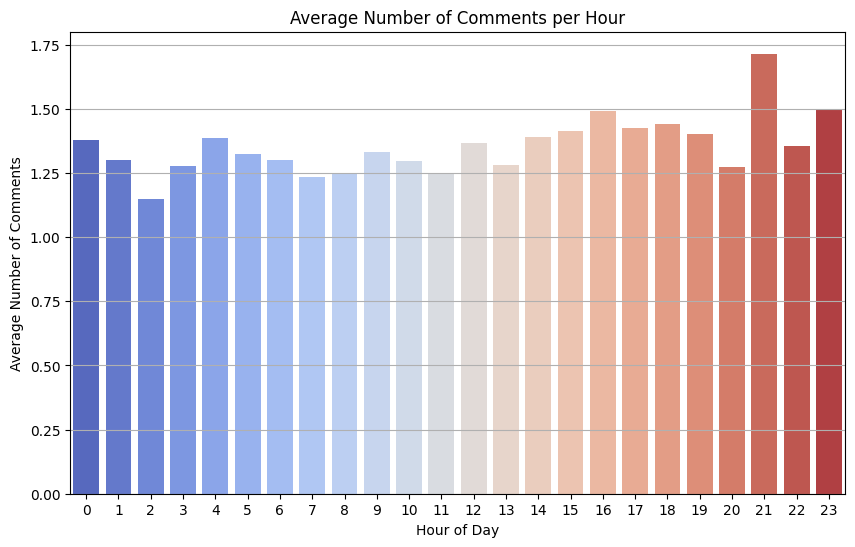

In [3]:
analyze_comment_times(Comments)

/Users/wojciechbasinski/stack-exchange-data/functions.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posts_interactions['Interactions'] = posts_interactions['AnswerCount'] + posts_interactions['CommentCount'] + posts_interactions['FavoriteCount']


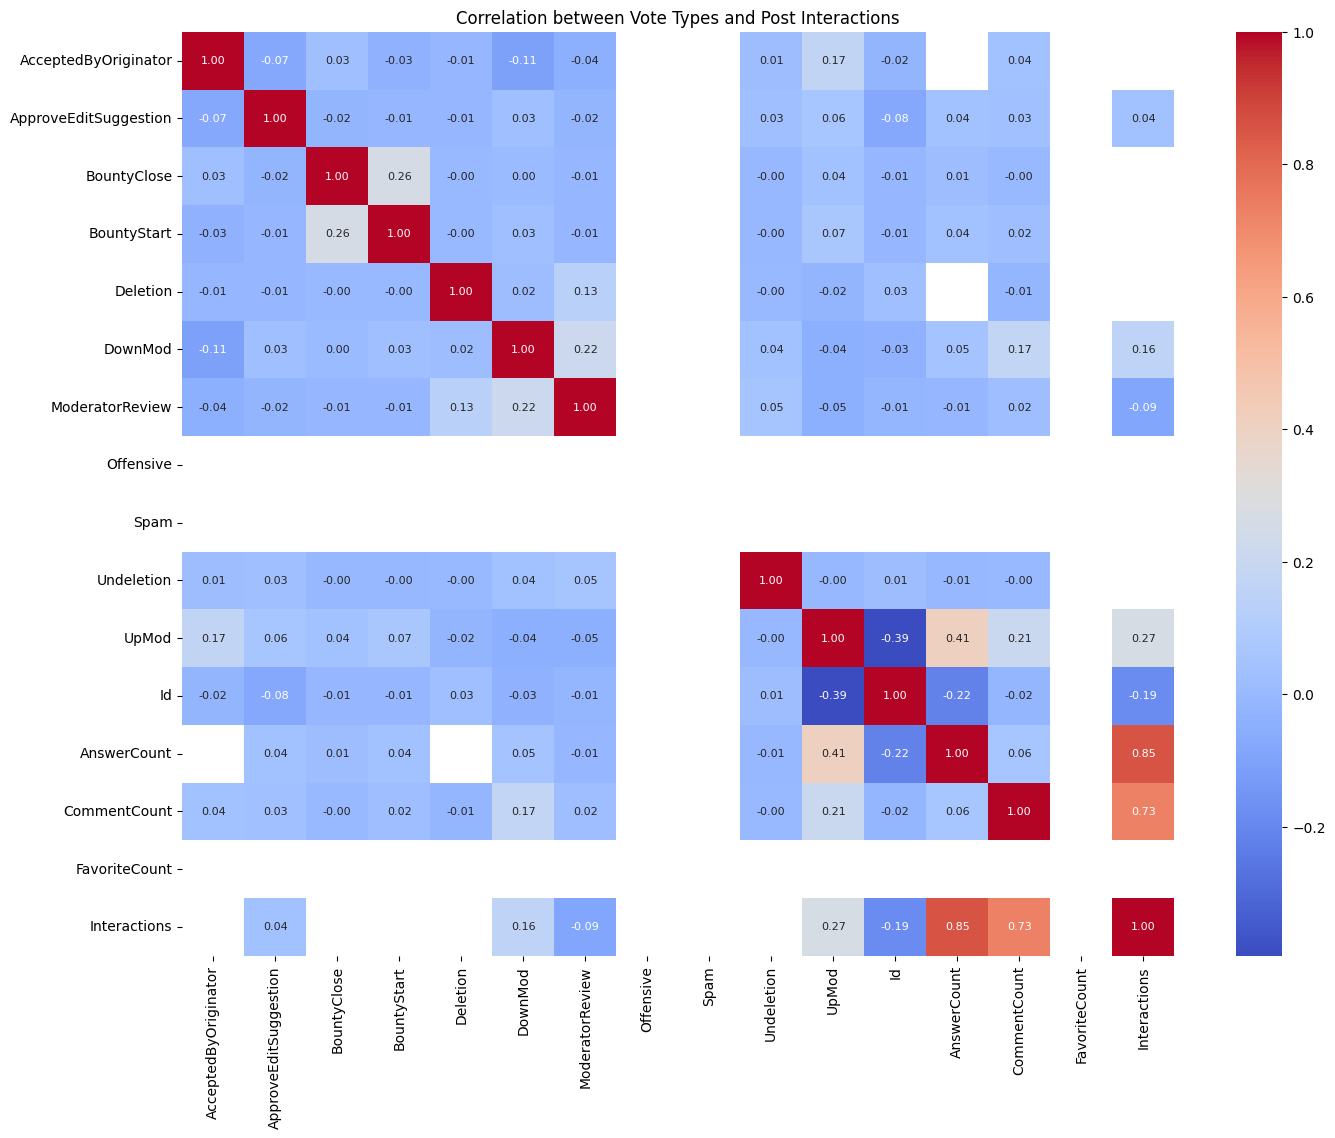

,AcceptedByOriginator,ApproveEditSuggestion,BountyClose,BountyStart,Deletion,DownMod,ModeratorReview,Offensive,Spam,Undeletion,UpMod,Id,AnswerCount,CommentCount,FavoriteCount,Interactions
AcceptedByOriginator,1.000000,-0.074892,0.025117,-0.032663,-0.011454,-0.105888,-0.040500,NaN,NaN,0.014266,0.167160,-0.022463,NaN,0.039596,NaN,NaN
ApproveEditSuggestion,-0.074892,1.000000,-0.023503,-0.011851,-0.007817,0.028314,-0.019032,NaN,NaN,0.026758,0.059149,-0.078434,0.038232,0.034675,NaN,0.036070
BountyClose,0.025117,-0.023503,1.000000,0.260055,-0.001652,0.004293,-0.008752,NaN,NaN,-0.003698,0.040295,-0.008109,0.014152,-0.000580,NaN,NaN
BountyStart,-0.032663,-0.011851,0.260055,1.000000,-0.001567,0.027168,-0.008301,NaN,NaN,-0.003507,0.069173,-0.009121,0.037557,0.021401,NaN,NaN
Deletion,-0.011454,-0.007817,-0.001652,-0.001567,1.000000,0.017626,0.133002,NaN,NaN,-0.001230,-0.022341,0.028180,NaN,-0.014818,NaN,NaN
DownMod,-0.105888,0.028314,0.004293,0.027168,0.017626,1.000000,0.215502,NaN,NaN,0.039457,-0.043158,-0.029868,0.050916,0.172705,NaN,0.157043
ModeratorReview,-0.040500,-0.019032,-0.008752,-0.008301,0.133002,0.215502,1.000000,NaN,NaN,0.054333,-0.045202,-0.014814,-0.012268,0.024074,NaN,-0.085486
Offensive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Undeletion,0.014266,0.026758,-0.003698,-0.003507,-0.001230,0.039457,0.054333,NaN,NaN,1.000000,-0.004137,0.014843,-0.007295,-0.002155,NaN,NaN


In [4]:
analyze_votes_and_engagement(Votes, Posts)

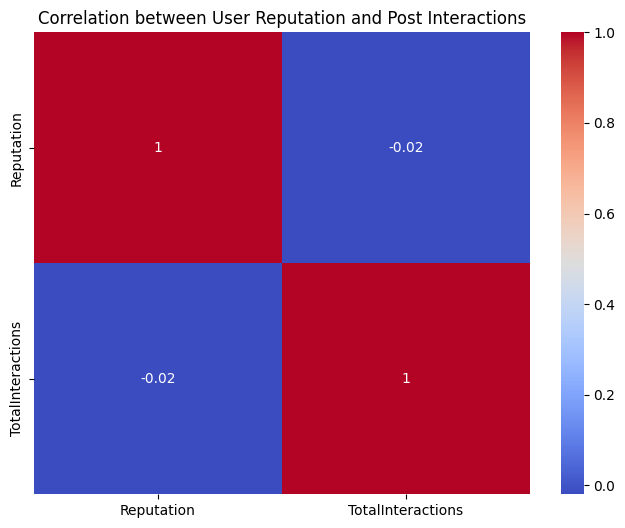

,Reputation,TotalInteractions
Reputation,1.000000,-0.019677
TotalInteractions,-0.019677,1.000000


In [5]:
analyze_user_reputation_and_post_interactions(Users , Posts)

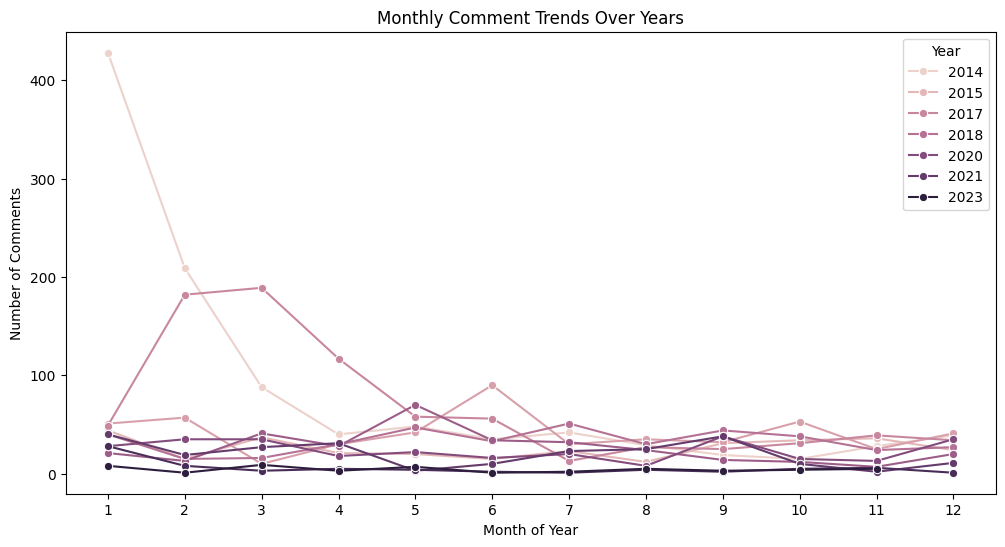

,Year,Month,CommentCount
0,2014,1,428
1,2014,2,209
2,2014,3,88
3,2014,4,40
4,2014,5,48
...,...,...,...
114,2023,7,2
115,2023,8,5
116,2023,9,3
117,2023,10,4


In [6]:
analyze_comments_by_time_of_year(Comments)

Correlation between views and interactions (outliers removed): 0.273
Correlation between views and post length (outliers removed): 0.568
Correlation between title length and interactions (outliers removed): -0.155
Correlation between views and title length (outliers removed): -0.244
Correlation between post length and interactions (outliers removed): 0.208


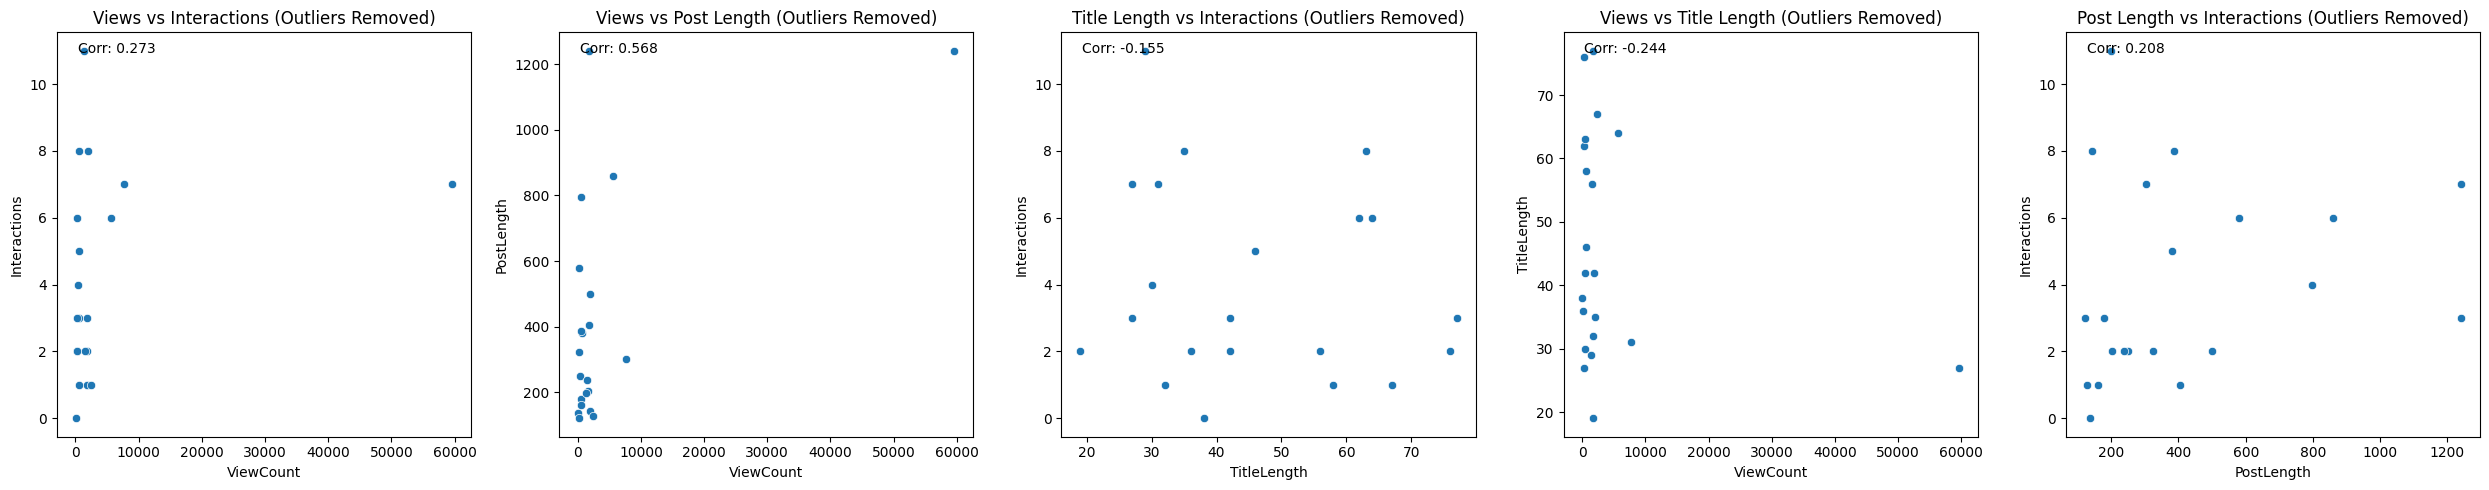

{'views_interactions_corr': 0.2725072766842148,
 'views_post_length_corr': 0.5679351705900951,
 'title_length_interactions_corr': -0.1547317248452712,
 'views_title_length_corr': -0.24442461059925613,
 'post_length_interactions_corr': 0.2077124150854279}

In [3]:
analyze_post_data(Posts)

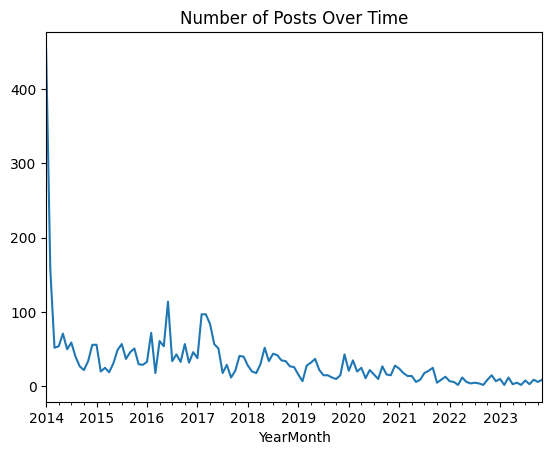

In [10]:
plot_posts_over_time(Posts)

/Users/wojciechbasinski/stack-exchange-data/functions.py:225: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='TagName', data=top_tags, palette='viridis')


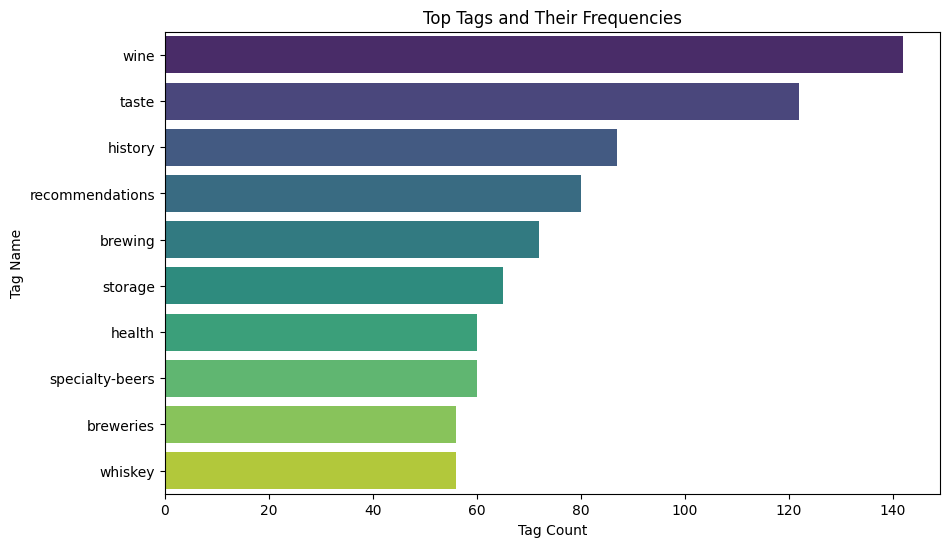

In [9]:
plot_top_tags(Tags)

/Users/wojciechbasinski/stack-exchange-data/functions.py:238: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PostTypeId', data=merged_posts_history, palette='Set2')


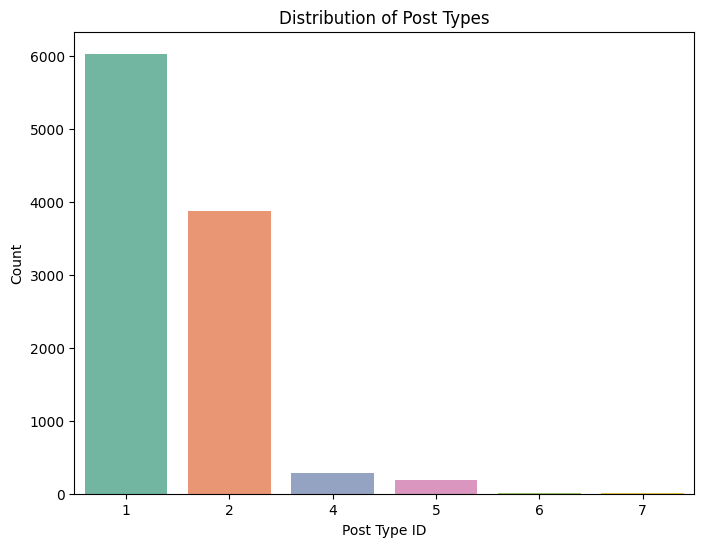

In [13]:
plot_post_types_distribution(Posts,PostHistory)

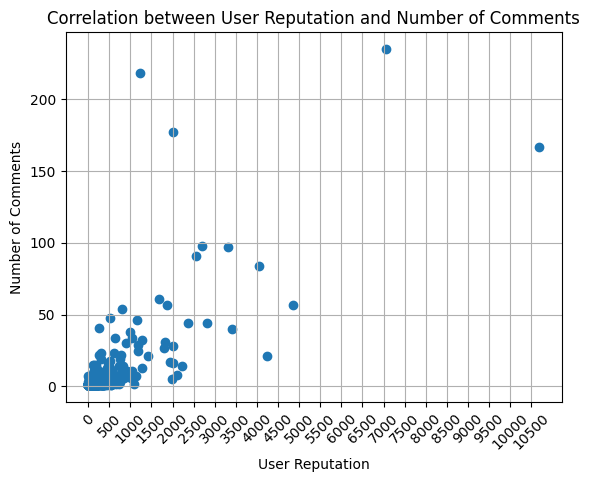

Original Correlation: 0.7493957336210708
Filtered Correlation: 0.31344709546333094


In [14]:
plot_reputation_comment_correlation(Users, Comments)